In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funciones_ML as bt
import seaborn as sns

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#  INTRODUCCION

Este proyecto esta basado en la concatenación de 12 dataset con datos tecnicos y concretos sobre ataques malware, siendo la ide del presente trabajo en analizar la gran cantidad de datos obtenidos para establecer un modelo de red neuronal que pueda prevenir los ataques malware identificados como "benign o malicious" e ir alimentándolo en un futuro con nuevos datos. 

DF1

In [2]:
df_1=pd.read_csv(R"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", sep="|")

In [55]:
df_1.shape

(1008748, 23)

In [56]:
df_1.head(1)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,"1,525,879,831",CUmrqr4svHuSXJy5z7,192.168.100.103,"51,524",65.127.233.163,23,tcp,-,2.999051,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan


DF2

In [3]:
df_2=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv", sep="|")

In [58]:
df_2.shape

(156103, 23)

DF3

In [4]:
df_3=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-8-1conn.log.labeled.csv", sep="|")

In [5]:
df_3.shape

(10403, 23)

DF4

In [6]:
df_4=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv", sep="|")

In [62]:
df_4.shape

(6378293, 23)

DF5

In [7]:
df_5=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv", sep="|")

In [64]:
df_5.shape

(3209, 23)

DF6

In [8]:
df_6=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv", sep="|")

In [66]:
df_6.shape

(3286, 23)

DF7

In [9]:
df_7=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv", sep="|")

In [68]:
df_7.shape

(23145, 23)

DF8

In [10]:
df_8=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv", sep="|")

In [70]:
df_8.shape

(10447787, 23)

DF9

In [11]:
df_9=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv", sep="|")

In [72]:
df_9.shape

(4426, 23)

DF10

In [12]:
df_10=pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv", sep="|")

In [74]:
df_10.shape

(237, 23)

DF11

In [13]:
dtypes = {8: 'str', 9: 'str', 10: 'str'} 
df_11 = pd.read_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv", sep="|", dtype=dtypes)

In [76]:
df_11.shape

(3394338, 23)

DF12

In [14]:
df_12=pd.read_csv("\Cursos\REPOSITORIOS\DATASET\malware_total\original\CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv", sep="|")

In [78]:
df_12.shape

(3581028, 23)

In [34]:
lista=[df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]

CONCATENO LOS 12 ANTERIORES

In [35]:
df_malware_origen= pd.concat(lista, axis=0)

In [36]:
df_malware_origen.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,"1,525,879,831",CUmrqr4svHuSXJy5z7,192.168.100.103,"51,524",65.127.233.163,23,tcp,-,2.999051,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
1,"1,525,879,831",CH98aB3s1kJeq6SFOc,192.168.100.103,"56,305",63.150.16.171,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
2,"1,525,879,831",C3GBTkINvXNjVGtN5,192.168.100.103,"41,101",111.40.23.49,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
3,"1,525,879,832",CDe43c1PtgynajGI6,192.168.100.103,"60,905",131.174.215.147,23,tcp,-,2.998796,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
4,"1,525,879,832",CJaDcG3MZzvf1YVYI4,192.168.100.103,"44,301",91.42.47.63,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan


In [82]:
df_malware_origen.shape

(25011003, 23)

HAGO UN SAMPLE DE 5MB DEL DATA ORIGEN SIN TRATAR

In [84]:
dtypes = {8: 'str', 9: 'str', 10: 'str'}
df_muestra_sin_tratar=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv", chunksize=10000000 , dtype=dtypes)
for chunk in df_muestra_sin_tratar:
    # Obtiene una muestra aleatoria de 194000 filas que son 5mb
    df_sample5MB_sin_tratar= chunk.sample(200000)
    
size = df_sample5MB_sin_tratar.size

size_mb = size / 1024 / 1024
size_mb

4.38690185546875

In [85]:
df_sample5MB_sin_tratar.to_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_sample5MB_sin_tratar.csv", index=False)

## EDA.- COMENZAMOS CON LAS TAREA DE LIMPIEZA Y TRATAMIENTO DE DATOS

In [86]:
df_malware_origen.isnull().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173954
dtype: int64

LISTA DE COLUMNAS A ELIMINAR

In [37]:
eliminacion=[]
for col in df_malware_origen.columns:
    if df_malware_origen[col].isnull().sum()>0:
        eliminacion.append(col)
 

CONTAR GUIONES

In [38]:
def contar_guiones(df, columnas):
    for col in columnas:
        if df[col].dtype == 'object':  
            print(col, df[col].str.count("-").sum())

In [89]:
contar_guiones(df_malware_origen,df_malware_origen.columns) 

uid 0
id.orig_h 0
id.resp_h 0
proto 0
service 24993006
duration 16904965
orig_bytes 15272073
resp_bytes 15272073
conn_state 0
local_orig 25011003
local_resp 25011003
history 25116
tunnel_parents 25011003
label 0
detailed-label 8780158.0


VALORES UNICOS DE LAS COLUMNAS Y SU NUMERO

In [39]:
def valores_unicos(df, limite=10):
    for col in df.columns:
        unicos = df[col].unique()
        if len(unicos) > limite:
            print(f"{col}: {unicos[:limite]} + ({len(unicos)} valores únicos en total)")
        else:
            print(f"{col}: {unicos}")

In [91]:
valores_unicos(df_malware_origen)

ts: [1.52587983e+09 1.52587983e+09 1.52587983e+09 1.52587983e+09
 1.52587983e+09 1.52587983e+09 1.52587983e+09 1.52587983e+09
 1.52587983e+09 1.52587983e+09] + (25011003 valores únicos en total)
uid: ['CUmrqr4svHuSXJy5z7' 'CH98aB3s1kJeq6SFOc' 'C3GBTkINvXNjVGtN5'
 'CDe43c1PtgynajGI6' 'CJaDcG3MZzvf1YVYI4' 'CMBrup3BLXivSp4Avc'
 'CfHl9r3XMYtDQRrHnh' 'C7USrA15nFVkniMqC5' 'CDtZ4so7bHKpIeCmi'
 'Cj9lm7amKnWiNDh9c'] + (25011003 valores únicos en total)
id.orig_h: ['192.168.100.103' '192.168.100.1' '122.152.1.198' '77.217.131.211'
 '182.38.96.176' '192.232.220.245' '211.170.38.34' '71.238.84.246'
 '147.97.27.145' '87.204.77.175'] + (21442 valores únicos en total)
id.orig_p: [51524. 56305. 41101. 60905. 44301. 50244. 34243. 34840. 58525. 43849.] + (65536 valores únicos en total)
id.resp_h: ['65.127.233.163' '63.150.16.171' '111.40.23.49' '131.174.215.147'
 '91.42.47.63' '120.210.108.200' '147.7.65.203' '145.164.35.6'
 '177.75.151.125' '94.145.70.119'] + (11654579 valores únicos en total)
id.resp_

In [40]:
for col in df_malware_origen[["uid", "id.orig_h", "duration"]]:
    eliminacion.append(col)

In [41]:
eliminacion

['detailed-label', 'uid', 'id.orig_h', 'duration']

In [42]:
df_malware_origen.drop(eliminacion, axis=1, inplace=True)

Convertimos los guiones en NaN

In [43]:
df_malware_origen.replace("-", np.nan, inplace=True)
#lo paso a formato de punto flotante para mostrar COMO NaN los guiones
pd.options.display.float_format = '{:,.0f}'.format 

In [23]:
df_malware_origen.isna().sum()

ts                       0
id.orig_p                0
id.resp_h                0
id.resp_p                0
proto                    0
service           24993006
orig_bytes        15272073
resp_bytes        15272073
conn_state               0
local_orig        25011003
local_resp        25011003
missed_bytes             0
history              25116
orig_pkts                0
orig_ip_bytes            0
resp_pkts                0
resp_ip_bytes            0
tunnel_parents    25011003
label                    0
dtype: int64

In [44]:
#debido a la gran cantidad de nulos, me cargo varias columnas : ["service", "duration", orig_bytes","resp_bytes",local_orig", "local_resp","tunnel_parents", "detailed_label"]
df_malware_origen.drop(columns={"service", "orig_bytes","resp_bytes","local_orig", "local_resp","tunnel_parents"}, inplace=True)


A history la imputo con la moda ya tenia pocoS 25000 nulos

In [45]:
df_malware_origen.history.fillna("S", inplace=True)
    

MAPEO LA TARGET

In [46]:
df_malware_origen.label.value_counts()/df_malware_origen.shape[0]*100

Benign                                  35
Malicious                               28
Malicious   DDoS                        23
Malicious   PartOfAHorizontalPortScan   14
Malicious   C&C                          0
Malicious   Attack                       0
Malicious   FileDownload                 0
Name: label, dtype: float64

In [47]:
df_malware_origen.to_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv", index=False)

LA RENOMBRO

In [48]:
df_malware_origen.rename(columns={"label": "Target"}, inplace=True)

CONVIERTO LA TARGET EN BINARIA CON VALORES BENIGN Y MALICIOUS

In [49]:
df_malware_origen.Target = df_malware_origen.Target.apply(lambda x: "Malicious" if "Malicious"in x else x)


In [50]:
df_malware_origen.Target.value_counts()

Malicious    16230845
Benign        8780158
Name: Target, dtype: int64

SE MODIFICA EL FORMATO DE HORA DE UNIX A FORMATO DATATIME

In [51]:
df_malware_origen.ts

0         1,525,879,831
1         1,525,879,831
2         1,525,879,831
3         1,525,879,832
4         1,525,879,832
               ...     
3581023   1,569,025,924
3581024   1,568,941,445
3581025   1,569,026,391
3581026   1,569,026,380
3581027   1,569,026,383
Name: ts, Length: 25011003, dtype: float64

In [54]:
#convierto de horario unix a datetime
df_malware_origen['ts'] = pd.to_datetime(df_malware_origen['ts'], unit='s')

In [53]:
df_malware_origen.head()

,ts,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,Target
0,"1,525,879,831","51,524",65.127.233.163,23,tcp,S0,0,S,3,180,0,0,Malicious
1,"1,525,879,831","56,305",63.150.16.171,23,tcp,S0,0,S,1,60,0,0,Malicious
2,"1,525,879,831","41,101",111.40.23.49,23,tcp,S0,0,S,1,60,0,0,Malicious
3,"1,525,879,832","60,905",131.174.215.147,23,tcp,S0,0,S,3,180,0,0,Malicious
4,"1,525,879,832","44,301",91.42.47.63,23,tcp,S0,0,S,1,60,0,0,Malicious


In [55]:
#separo columnas de tiempos
df_malware_origen["anyo"] = df_malware_origen["ts"].dt.year
df_malware_origen["mes"] = df_malware_origen["ts"].dt.month
df_malware_origen["dia"] = df_malware_origen["ts"].dt.day
df_malware_origen["hora"] = df_malware_origen["ts"].dt.hour



In [59]:
df_malware_origen["dia_semanal"] = df_malware_origen["ts"].dt.dayofweek

In [60]:
df_malware_origen

,ts,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,Target,anyo,mes,dia,hora,dia_semanal
0,2018-05-09 15:30:31.015811072,"51,524",65.127.233.163,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15,2
1,2018-05-09 15:30:31.025054976,"56,305",63.150.16.171,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2
2,2018-05-09 15:30:31.045044992,"41,101",111.40.23.49,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2
3,2018-05-09 15:30:32.016239872,"60,905",131.174.215.147,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15,2
4,2018-05-09 15:30:32.024985088,"44,301",91.42.47.63,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581023,2019-09-21 00:32:03.773210880,123,89.221.210.188,123,udp,SF,0,Dd,2,152,2,152,Benign,2019,9,21,0,5
3581024,2019-09-20 01:04:04.764034048,"37,306",102.165.48.81,"17,769",tcp,S1,0,ShAdDaT,"8,952","483,602","9,613","520,116",Malicious,2019,9,20,1,4
3581025,2019-09-21 00:39:50.773122048,123,212.111.30.190,123,udp,SF,0,Dd,2,152,2,152,Benign,2019,9,21,0,5
3581026,2019-09-21 00:39:39.773117184,123,5.1.56.123,123,udp,SF,0,Dd,2,152,2,152,Benign,2019,9,21,0,5


In [57]:
df_malware_origen.shape

(25011003, 17)

In [40]:
df_malware_origen.head()

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anyo,mes,dia,hora
0,"51,524",65.127.233.163,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15
1,"56,305",63.150.16.171,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15
2,"41,101",111.40.23.49,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15
3,"60,905",131.174.215.147,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15
4,"44,301",91.42.47.63,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15


In [58]:
df_malware_origen.to_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv", index=False)

In [61]:
df_malware_origen.to_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen_dia_semanal.csv", index=False)

HAGO OTRO DF SAMPLE CON EL ARVHIVO ORIGINAL SIN TRATAR CON NAN

In [118]:
dtypes= {8: 'str', 9: 'str', 10: 'str'}
df_muestra_sin_nulos_guiones=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\df_malware_origen.csv", chunksize=10000000, dtype=dtypes)
for chunk in df_muestra_sin_nulos_guiones:
    # Obtiene una muestra aleatoria de 194000 filas que son 5mb
    df_muestra_sin_nulos_guiones= chunk.sample(330000)
    
size = df_muestra_sin_nulos_guiones.size

size_mb = size / 1024 / 1024
size_mb




5.035400390625

# ESTUDIO GRAFICO DEL DATASET

In [105]:
df_malware_origen.head()

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,anyo,mes,dia,hora,dia_semanal
0,"51,524",65.127.233.163,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15,2
1,"56,305",63.150.16.171,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2
2,"41,101",111.40.23.49,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2
3,"60,905",131.174.215.147,23,tcp,S0,0,S,3,180,0,0,Malicious,2018,5,9,15,2
4,"44,301",91.42.47.63,23,tcp,S0,0,S,1,60,0,0,Malicious,2018,5,9,15,2


CONTINUA EN EL NOTEBOOK 1.1

1. ANALISIS DE LA TARGET

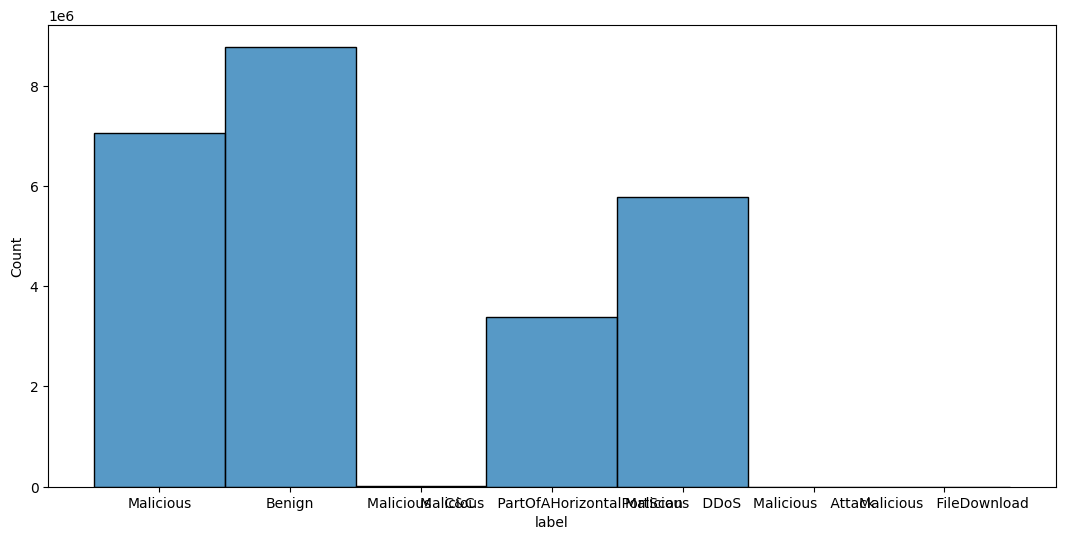

In [106]:
plt.figure(figsize=(13, 6))
sns.histplot(df_malware_origen["label"], bins=2);

Debido a que algunos valores unicos son malicious mas alguna palabra, vamos a sumar estas a malicius para quedarnos con una binaria

In [107]:
df_malware_origen['label'] = df_malware_origen['label'].apply(lambda x: 'Malicious' if 'Malicious' in x else x)

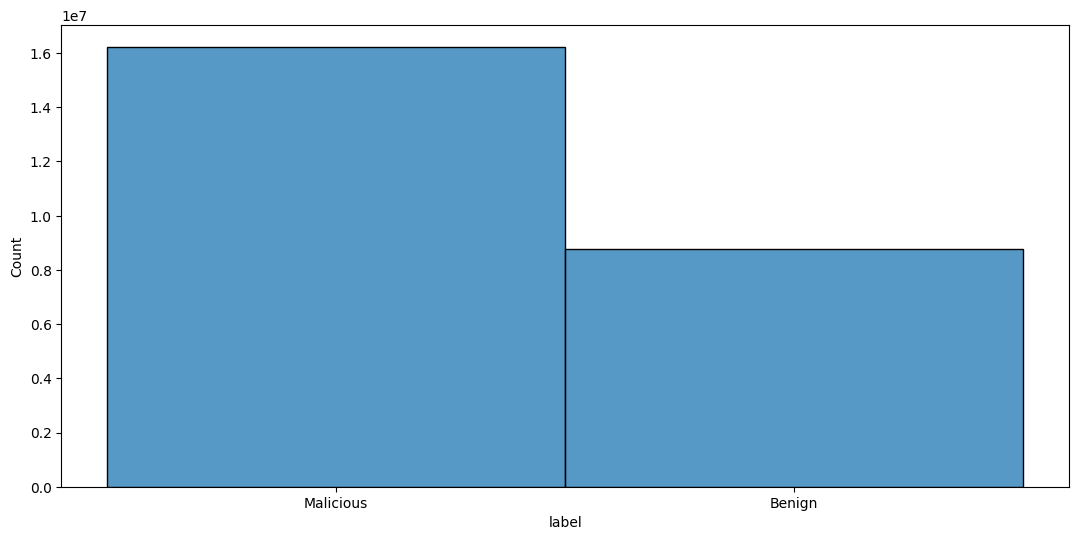

In [108]:
plt.figure(figsize=(13, 6))
sns.histplot(df_malware_origen["label"], bins=2);

GRAFICO DE LINEAS ENTRE TARGET , AÑO , HORA Y DIASEMANAL EN GRAFICO DE LINEAS

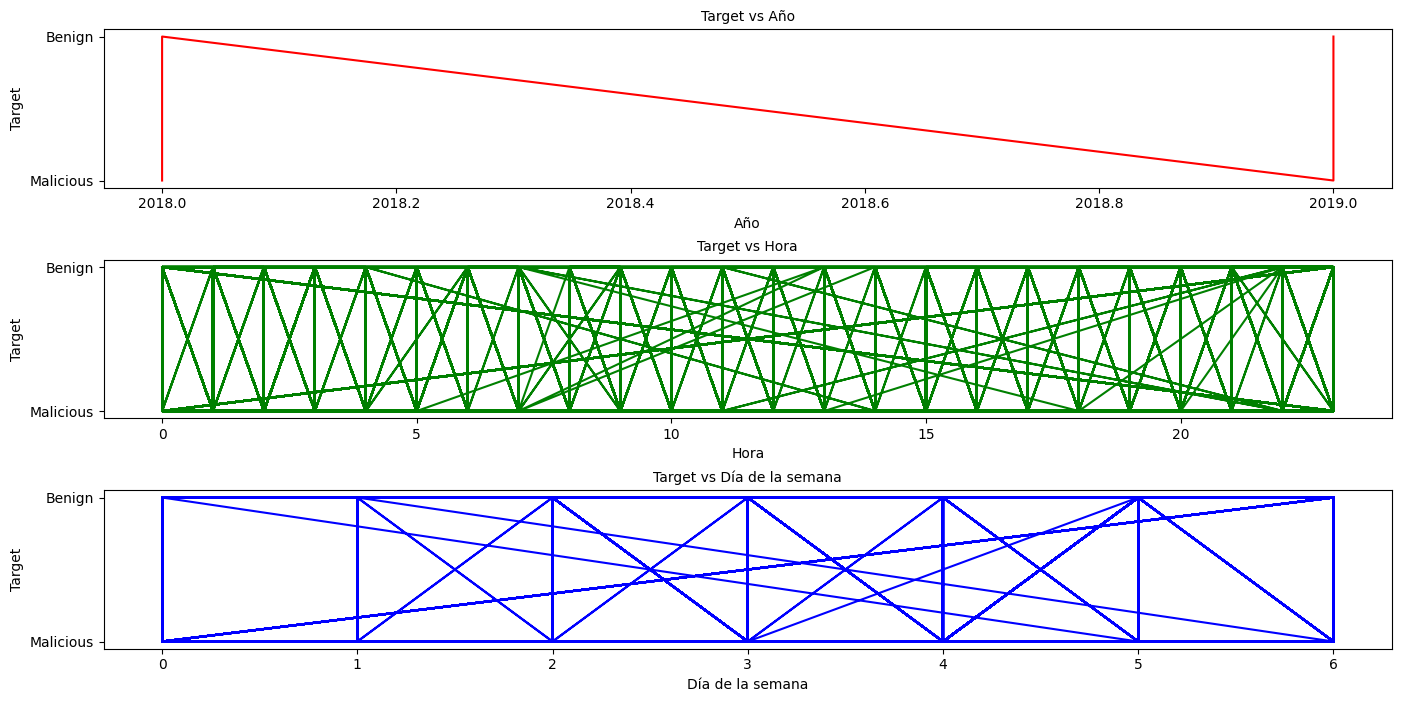

In [111]:
plt.figure(figsize=(14, 7))

# Gráfico de línea para 'anyo'
plt.subplot(3, 1, 1)
plt.plot(df_malware_origen['anyo'], df_malware_origen['label'], color='red')
plt.title('Target vs Año')
plt.xlabel('Año')
plt.ylabel('Target')

# Gráfico de línea para 'hora'
plt.subplot(3, 1, 2)
plt.plot(df_malware_origen['hora'], df_malware_origen['label'], color='green')
plt.title('Target vs Hora')
plt.xlabel('Hora')
plt.ylabel('Target')

# Gráfico de línea para 'dia_semanal'
plt.subplot(3, 1, 3)
plt.plot(df_malware_origen['dia_semanal'], df_malware_origen['label'], color='blue')
plt.title('Target vs Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

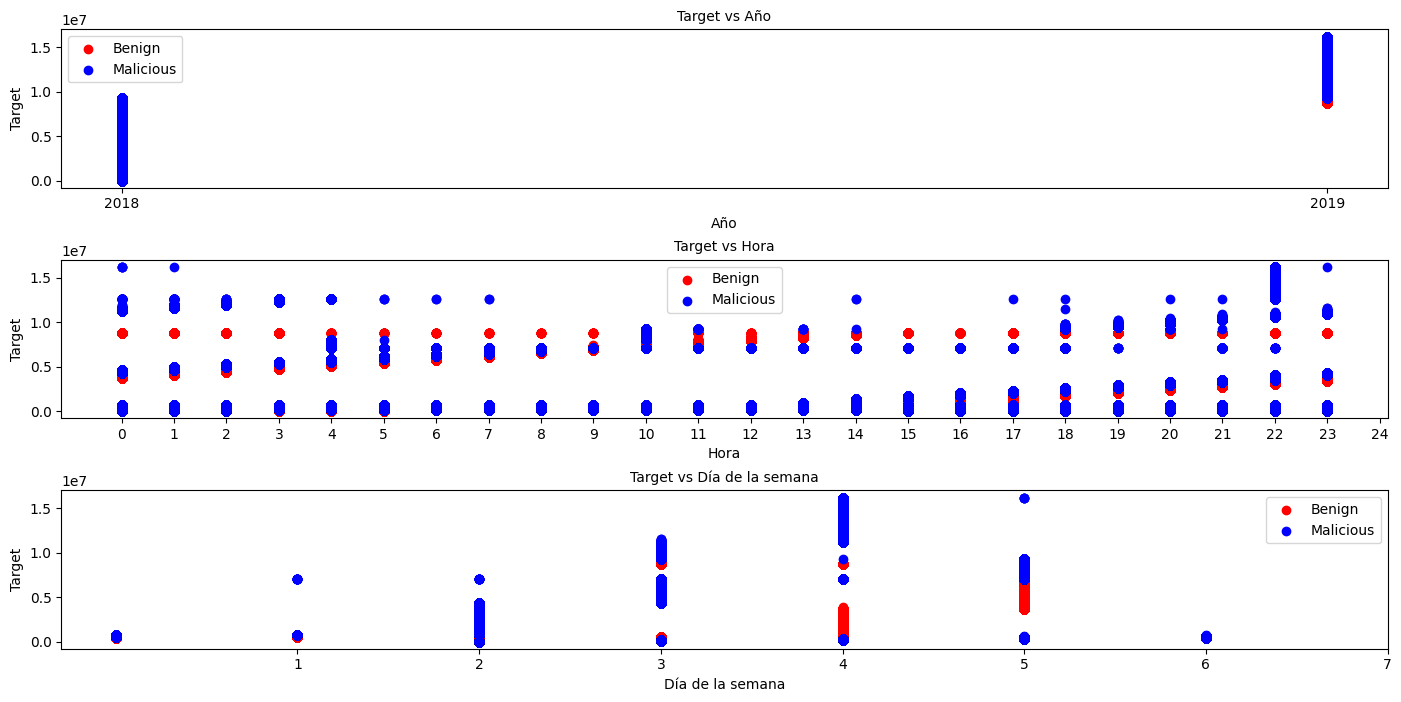

In [114]:
plt.figure(figsize=(14, 7))

# Gráfico de línea para 'anyo'
plt.subplot(3, 1, 1)
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Benign']['anyo'], range(len(df_malware_origen[df_malware_origen['label'] == 'Benign'])), color='red', label='Benign')
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Malicious']['anyo'], range(len(df_malware_origen[df_malware_origen['label'] == 'Malicious'])), color='blue', label='Malicious')
plt.title('Target vs Año')
plt.xlabel('Año')
plt.ylabel('Target')
plt.xticks(df_malware_origen['anyo'].unique()) 
plt.legend()

# Gráfico de línea para 'hora'
plt.subplot(3, 1, 2)
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Benign']['hora'], range(len(df_malware_origen[df_malware_origen['label'] == 'Benign'])), color='red', label='Benign')
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Malicious']['hora'], range(len(df_malware_origen[df_malware_origen['label'] == 'Malicious'])), color='blue', label='Malicious')
plt.title('Target vs Hora')
plt.xlabel('Hora')
plt.ylabel('Target')
plt.xticks(range(25)) 
plt.legend()

# Gráfico de línea para 'dia_semanal'
plt.subplot(3, 1, 3)
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Benign']['dia_semanal'], range(len(df_malware_origen[df_malware_origen['label'] == 'Benign'])), color='red', label='Benign')
plt.scatter(df_malware_origen[df_malware_origen['label'] == 'Malicious']['dia_semanal'], range(len(df_malware_origen[df_malware_origen['label'] == 'Malicious'])), color='blue', label='Malicious')
plt.title('Target vs Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Target')
plt.xticks(range(1, 8)) 
plt.legend()

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

CONTINUA EN EL NOTEBOOK MALWARE 1.2